# Multi-context xQTL colocalization analysis in the APOE TAD region

Date: Sep 08, 2025

We performed xQTL-wide multi-context colocalization analysis using ColocBoost on 603 genes located within the TAD region overlapping with APOE (chr19:41840000-47960000). Multi-context colocalization analyses were conducted separately across four xQTL cohorts: ROSMAP, MSBB, KNIGHT, and MIGA.

This notebook is a summary of the colocalization results of the gene in APOE TAD region, including the following sections:
1. *Multicontext colocalization results of APOE (ENSG00000130203)*: This section presents colocalization findings specifically for the APOE gene itself across the four xQTL cohorts. 
2. *Extract genes in APOE TAD region and summary of colocalization results*: This section identifies all 603 genes within the APOE TAD region and provides an overview of their colocalization patterns. It offers a comprehensive landscape of regulatory relationships across the entire TAD region.
3. *Connect colocalized xQTL to APOE2 and APOE4 - LD between xQTL and two loci*: This section examines the linkage disequilibrium relationships between identified colocalized xQTLs and the two key APOE loci. It determines whether colocalized signals are independent with APOE $\epsilon$2/APOE $\epsilon$4.

## 1. Multicontext colocalization results of APOE (ENSG00000130203)
Only ROSMAP xQTL cohort has colocalization results in APOE gene.
- Two CoS in APOE gene: one sQTL only colocalization (1 variant; chr19:44905923:44906601 in AC and DLPFC and chr19:44905841:44906601 in DLPFC) and one Microglia specific colocalization (52 variants with purity 0.63; Dejager and Kellis). The between-purity of two CoS is 0.02765798.
- Two sQTL uCoS in APOE gene: chr19:44905923:44906601 in PCC has between-purity 0.7973871 (a little bit smaller than the default cutoff 0.8), it should be a potential colocalization with the sQTL CoS.

In [4]:
setwd("/data1/deyk/xuewei/colocboost/pipeline/columbia/APOE")
library(tidyverse)
library(colocboost)

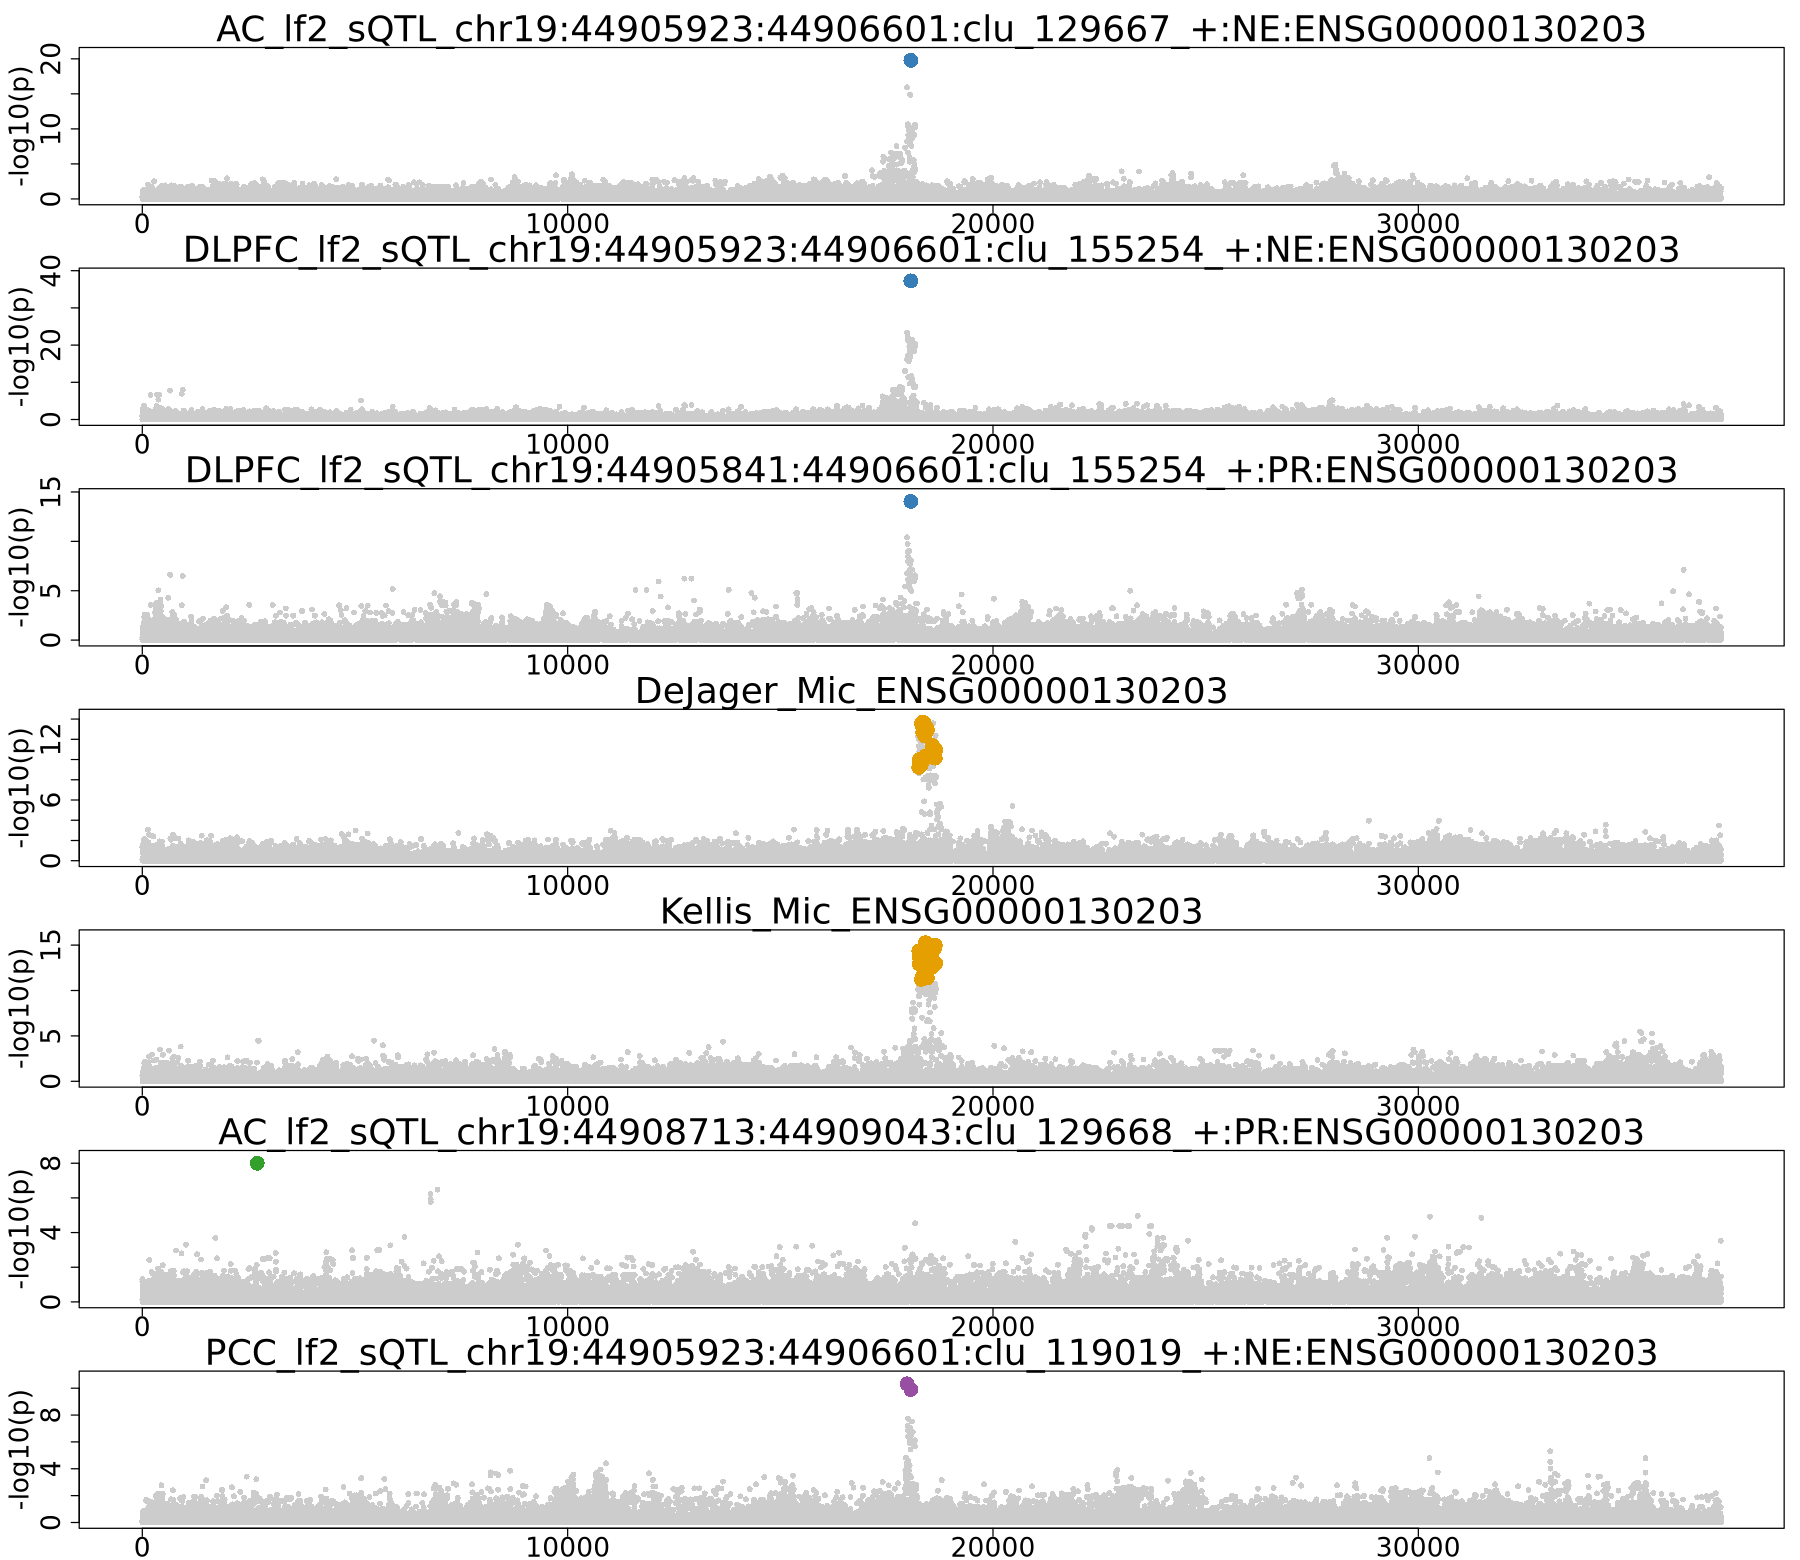

In [8]:
res <- readRDS("AD_xQTL.chr19_ENSG00000130203.cb_xqtl.rds")[[1]]
options(repr.plot.width = 15, repr.plot.height = 13)
colocboost_plot(res, plot_cols = 1, plot_ucos = T)

In [10]:
res$cos_summary

focal_outcome,colocalized_outcomes,cos_id,purity,top_variable,top_variable_vcp,cos_npc,min_npc_outcome,n_variables,colocalized_index,colocalized_variables,colocalized_variables_vcp
<lgl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
FALSE,AC_lf2_sQTL_chr19:44905923:44906601:clu_129667_+:NE:ENSG00000130203; DLPFC_lf2_sQTL_chr19:44905923:44906601:clu_155254_+:NE:ENSG00000130203; DLPFC_lf2_sQTL_chr19:44905841:44906601:clu_155254_+:PR:ENSG00000130203,cos1:y2_y12_y13,1.0000000,chr19:44905910:C:G,0.9999962,0.9997,0.9653,1,18069,chr19:44905910:C:G,0.99999615802828
FALSE,DeJager_Mic_ENSG00000130203; Kellis_Mic_ENSG00000130203,cos2:y19_y25,0.6135642,chr19:44954150:CA:CAAAAA,0.1921628,0.9280,0.9266,52,18414; 18549; 18587; 18601; 18607; 18590; 18612; 18623; 18487; 18643; 18591; 18594; 18380; 18381; 18574; 18256; 18410; 18346; 18339; 18653; 18347; 18273; 18275; 18404; 18267; 18450; 18280; 18408; 18271; 18396; 18272; 18303; 18316; 18313; 18458; 18407; 18409; 18416; 18349; 18366; 18367; 18368; 18378; 18400; 18403; 18406; 18374; 18382; 18394; 18405; 18350; 18268,chr19:44954150:CA:CAAAAA; chr19:44980181:A:C; chr19:44986934:A:G; chr19:44989803:T:C; chr19:44992424:A:G; chr19:44987312:A:G; chr19:44993518:A:G; chr19:44996130:T:C; chr19:44967657:CAA:CA; chr19:44999110:TAAAA:TAA; chr19:44987378:T:C; chr19:44987916:A:G; chr19:44951502:A:G; chr19:44951509:G:A; chr19:44983921:C:T; chr19:44938353:A:C; chr19:44954120:G:A; chr19:44947615:A:G; chr19:44946776:C:T; chr19:45001091:C:G; chr19:44947671:T:C; chr19:44940390:T:C; chr19:44940660:A:ATTGTT; chr19:44953848:A:G; chr19:44939092:T:C; chr19:44962801:T:C; chr19:44941309:G:T; chr19:44954049:C:T; chr19:44939831:G:C; chr19:44952989:T:C; chr19:44940247:A:G; chr19:44943014:C:T; chr19:44946027:T:G; chr19:44945208:T:G; chr19:44963328:ATT:AT; chr19:44954036:C:T; chr19:44954062:G:A; chr19:44954427:G:C; chr19:44948185:A:G; chr19:44949887:C:T; chr19:44949894:T:G; chr19:44949908:C:T; chr19:44951106:G:A; chr19:44953240:T:C; chr19:44953684:G:A; chr19:44953968:G:A; chr19:44950979:G:A; chr19:44952201:G:A; chr19:44952844:G:A; chr19:44953923:T:C; chr19:44948363:T:A; chr19:44939262:A:T,0.192162795565134; 0.0691354844356256; 0.0691354844356256; 0.0691354844356256; 0.0691354844356256; 0.0621637147919165; 0.0621637147919165; 0.0567102668365725; 0.043625396042876; 0.0398205367768834; 0.0129894451438679; 0.0129894451438679; 0.0104691140203157; 0.00940518513208866; 0.00891915352758621; 0.00794413573327479; 0.00750060527511009; 0.00736510142122448; 0.00641588295676565; 0.00604174645391398; 0.00591383362455378; 0.00552568995660008; 0.00531025280986186; 0.00522994412205646; 0.00496008056524899; 0.00495367647864553; 0.00492960635414186; 0.00460982161806744; 0.00449421064537547; 0.00443580792466791; 0.00429323831259321; 0.00427570490286433; 0.00409273914080022; 0.00406647343624; 0.00396080672243093; 0.00361576147684295; 0.00361576147684295; 0.00361576147684295; 0.00350839092650868; 0.00350839092650868; 0.00350839092650868; 0.00350839092650868; 0.00350839092650868; 0.00350839092650868; 0.00350839092650868; 0.00350839092650868; 0.00331811762548428; 0.00331315570877577; 0.00305552418962529; 0.00305552418962529; 0.00296544350912764; 0.00292232650327395


In [9]:
res$cos_details$cos_purity$min_abs_cor

,cos1:y2_y12_y13,cos2:y19_y25
cos1:y2_y12_y13,1.00000000,0.02765798
cos2:y19_y25,0.02765798,0.61356417


In [11]:
res$ucos_details$cos_ucos_purity$min_abs_cor

,ucos3:y3,ucos10:y29
cos1:y2_y12_y13,0.07483545,0.7973871
cos2:y19_y25,0.02394156,0.0158295


## 2. Summary of colocalization results of genes in APOE TAD region
Only consider 4460 xQTL (both in CoS and uCoS) located within APOE TAD region.

- These 4460 xQTL are identified by 133 genes spanning 378 CoS and uCoS. To get the number of independent sets of variants, we merged the sets if the cummulative summation of VCP for overlapped variants are greater than 0.5 for **each set**. That means, assuming cos1 (snp1, snp2, snp3) and cos2 (snp2, snp3, snp4), we merge cos1 and cos2 if and only if VCP(snp2+snp3)>0.5 calculated in cos1 and VCP(snp2+snp3)>0.5 calculated in cos2. A total of 336 independent sets identified in APOE TAD region.
- Excluding sQTL, the majority of colocalizations occur with bulk ROSMAP eQTL data across three cortical brain regions and two neuronal cell types (excitatory and inhibitory neurons). KNIGHT cohort eQTL and pQTL datasets lack analyzable xQTL signals in the APOE region.

### Extract genes in APOE TAD region

In [29]:
gene_TAD <- data.table::fread("/data1/deyk/ftp_fgc_xqtl/utils/TADB_enhanced_cis.coding.bed")
APOE_TAD <- gene_TAD %>% filter(gene_id == "ENSG00000130203")
APOE_TAD

#chr,start,end,gene_id
<chr>,<int>,<int>,<chr>
chr19,41840000,47960000,ENSG00000130203


In [13]:
genes_in_APOE <- gene_TAD %>% filter( `#chr` == APOE_TAD$`#chr` & end > APOE_TAD$start ) %>% filter( start < APOE_TAD$end)
genes_in_APOE %>% dim
genes_in_APOE %>% head(n=1)

[1] 603   4

#chr,start,end,gene_id
<chr>,<int>,<int>,<chr>
chr19,32720000,43520000,ENSG00000004776


### APOE colocalization results for all cohorts

In [14]:
APOE_summary <- readRDS("xqtl_only_APOE_all_cohorts_addGWAS.rds")
APOE_summary %>% dim

[1] 4460   23

In [15]:
APOE_summary %>% pull(region_ID) %>% unique %>% length
cos <- APOE_summary$identifier %>% unique
cos %>% length

[1] 133

[1] 378

In [16]:
source("merge_coloc_also_within_loci.R")
threshold <- 0.5
flat_cos <- lapply(1:length(cos), function(i){
    pos <- which(APOE_summary$identifier == cos[i])
    APOE_summary$variant_ID[pos]
})
flat_cos_vcp <- lapply(1:length(cos), function(i){
    pos <- which(APOE_summary$identifier == cos[i])
    APOE_summary$vcp[pos] %>% as.numeric
})
merge_pairwise_idx <- get_merge_pairwise_idx(flat_cos, flat_cos_vcp, threshold = threshold)
flat_coloc_outcome <- lapply(1:length(cos), function(i){
    pos <- which(APOE_summary$identifier == cos[i])
    tmp <- APOE_summary$event_ID[pos] %>% unique
    tmp <- lapply(tmp, function(tt) strsplit(tt, "; ")[[1]] )
    tmp %>% unlist %>% unique
})

In [17]:
length(merge_pairwise_idx)

[1] 336

In [18]:
final_cos <- final_vcp <- list()
final_colocOutcome <- c()
for (ii in 1:length(merge_pairwise_idx)){
    p.merge <- merge_pairwise_idx[[ii]]
    # - coloc outcomes 
    oo <- flat_coloc_outcome[p.merge] %>% unlist
    colocOutcome <- paste0(unique(oo), collapse = "; ")
    # - coloc CoS and pph4
    snps <- unlist(flat_cos[p.merge])
    vcps <- unlist(flat_cos_vcp[p.merge])
    context_df <- data.frame(SNP = snps, vcp = vcps, stringsAsFactors = FALSE)
    unique_snps <- unique(context_df$SNP)
    max_vcp <- sapply(unique_snps, function(snp) {
      max(context_df$vcp[context_df$SNP == snp], na.rm = TRUE)
      # min(context_df$vcp[context_df$SNP == snp], na.rm = TRUE)
    })
    merged_df <- data.frame(SNP = unique_snps, MaxVCP = max_vcp, stringsAsFactors = FALSE)
    cos <- merged_df$SNP
    vcp <- merged_df$MaxVCP
    # - coloc purity
    final_cos <- c(final_cos, list(cos))
    final_vcp <- c(final_vcp, list(vcp))
    final_colocOutcome <- c(final_colocOutcome, colocOutcome)
}
names(final_cos) <- 
    names(final_vcp) <- 
    names(final_colocOutcome) <- 
    paste0("ind_cos_", 1:length(merge_pairwise_idx))

In [25]:
contexts <- list(
    MIGA = c("MIGA_GFM", "MIGA_GTS", "MIGA_SVZ", "MIGA_THA"),
    MSBB = c("MSBB_eQTL_BM_10", "MSBB_eQTL_BM_22", "MSBB_eQTL_BM_36", "MSBB_eQTL_BM_44", "MSBB_pQTL_BM_36"),
    KNIGHT = c("KNIGHT_eQTL", "KNIGHT_pQTL"),
    ROSMAP = c("DLPFC_Bennett_pQTL", "DLPFC_Klein_gpQTL", "AC_lf2_sQTL", "DLPFC_lf2_sQTL", "PCC_lf2_sQTL",
              "DeJager_Ast", "DeJager_Mic", "DeJager_Exc", "DeJager_Inh", "DeJager_OPC", "DeJager_Oli",
              "Kellis_Ast", "Kellis_Mic", "Kellis_Exc", "Kellis_Inh", "Kellis_OPC", "Kellis_Oli",
              "ROSMAP_PCC", "ROSMAP_AC", "ROSMAP_DLPFC", "ROSMAP_Monocyte")
) %>% unlist
all_contexts <- c(contexts)
names(all_contexts) <- c(contexts)
all_contexts %>% length

[1] 32

In [26]:
coloc <- vector("list", length(all_contexts)) %>% setNames(all_contexts)
coloc <- lapply(all_contexts, function(ac){
    pos <- sapply(final_colocOutcome, function(fc){ grepl(ac, fc) }) %>% which
    names(final_colocOutcome)[pos]
})
sapply(coloc, length)

MIGA_GFM           MIGA_GTS           MIGA_SVZ           MIGA_THA 
                 1                  1                  1                  2 
   MSBB_eQTL_BM_10    MSBB_eQTL_BM_22    MSBB_eQTL_BM_36    MSBB_eQTL_BM_44 
                31                 22                 30                 29 
   MSBB_pQTL_BM_36        KNIGHT_eQTL        KNIGHT_pQTL DLPFC_Bennett_pQTL 
                 8                  0                  0                 17 
 DLPFC_Klein_gpQTL        AC_lf2_sQTL     DLPFC_lf2_sQTL       PCC_lf2_sQTL 
                 1                107                100                100 
       DeJager_Ast        DeJager_Mic        DeJager_Exc        DeJager_Inh 
                17                  2                 46                 25 
       DeJager_OPC        DeJager_Oli         Kellis_Ast         Kellis_Mic 
                 1                  9                  8                  4 
        Kellis_Exc         Kellis_Inh         Kellis_OPC         Kellis_Oli 
                35                 22                 12                 21 
        ROSMAP_PCC          ROSMAP_AC       ROSMAP_DLPFC    ROSMAP_Monocyte 
                61                 65                 72                  5

In [27]:
pos_no_coloc <- which( sapply(coloc, length) != 0 )
names(coloc)[-pos_no_coloc]
coloc <- coloc[pos_no_coloc]
all_contexts <- all_contexts[pos_no_coloc]

[1] "KNIGHT_eQTL" "KNIGHT_pQTL"

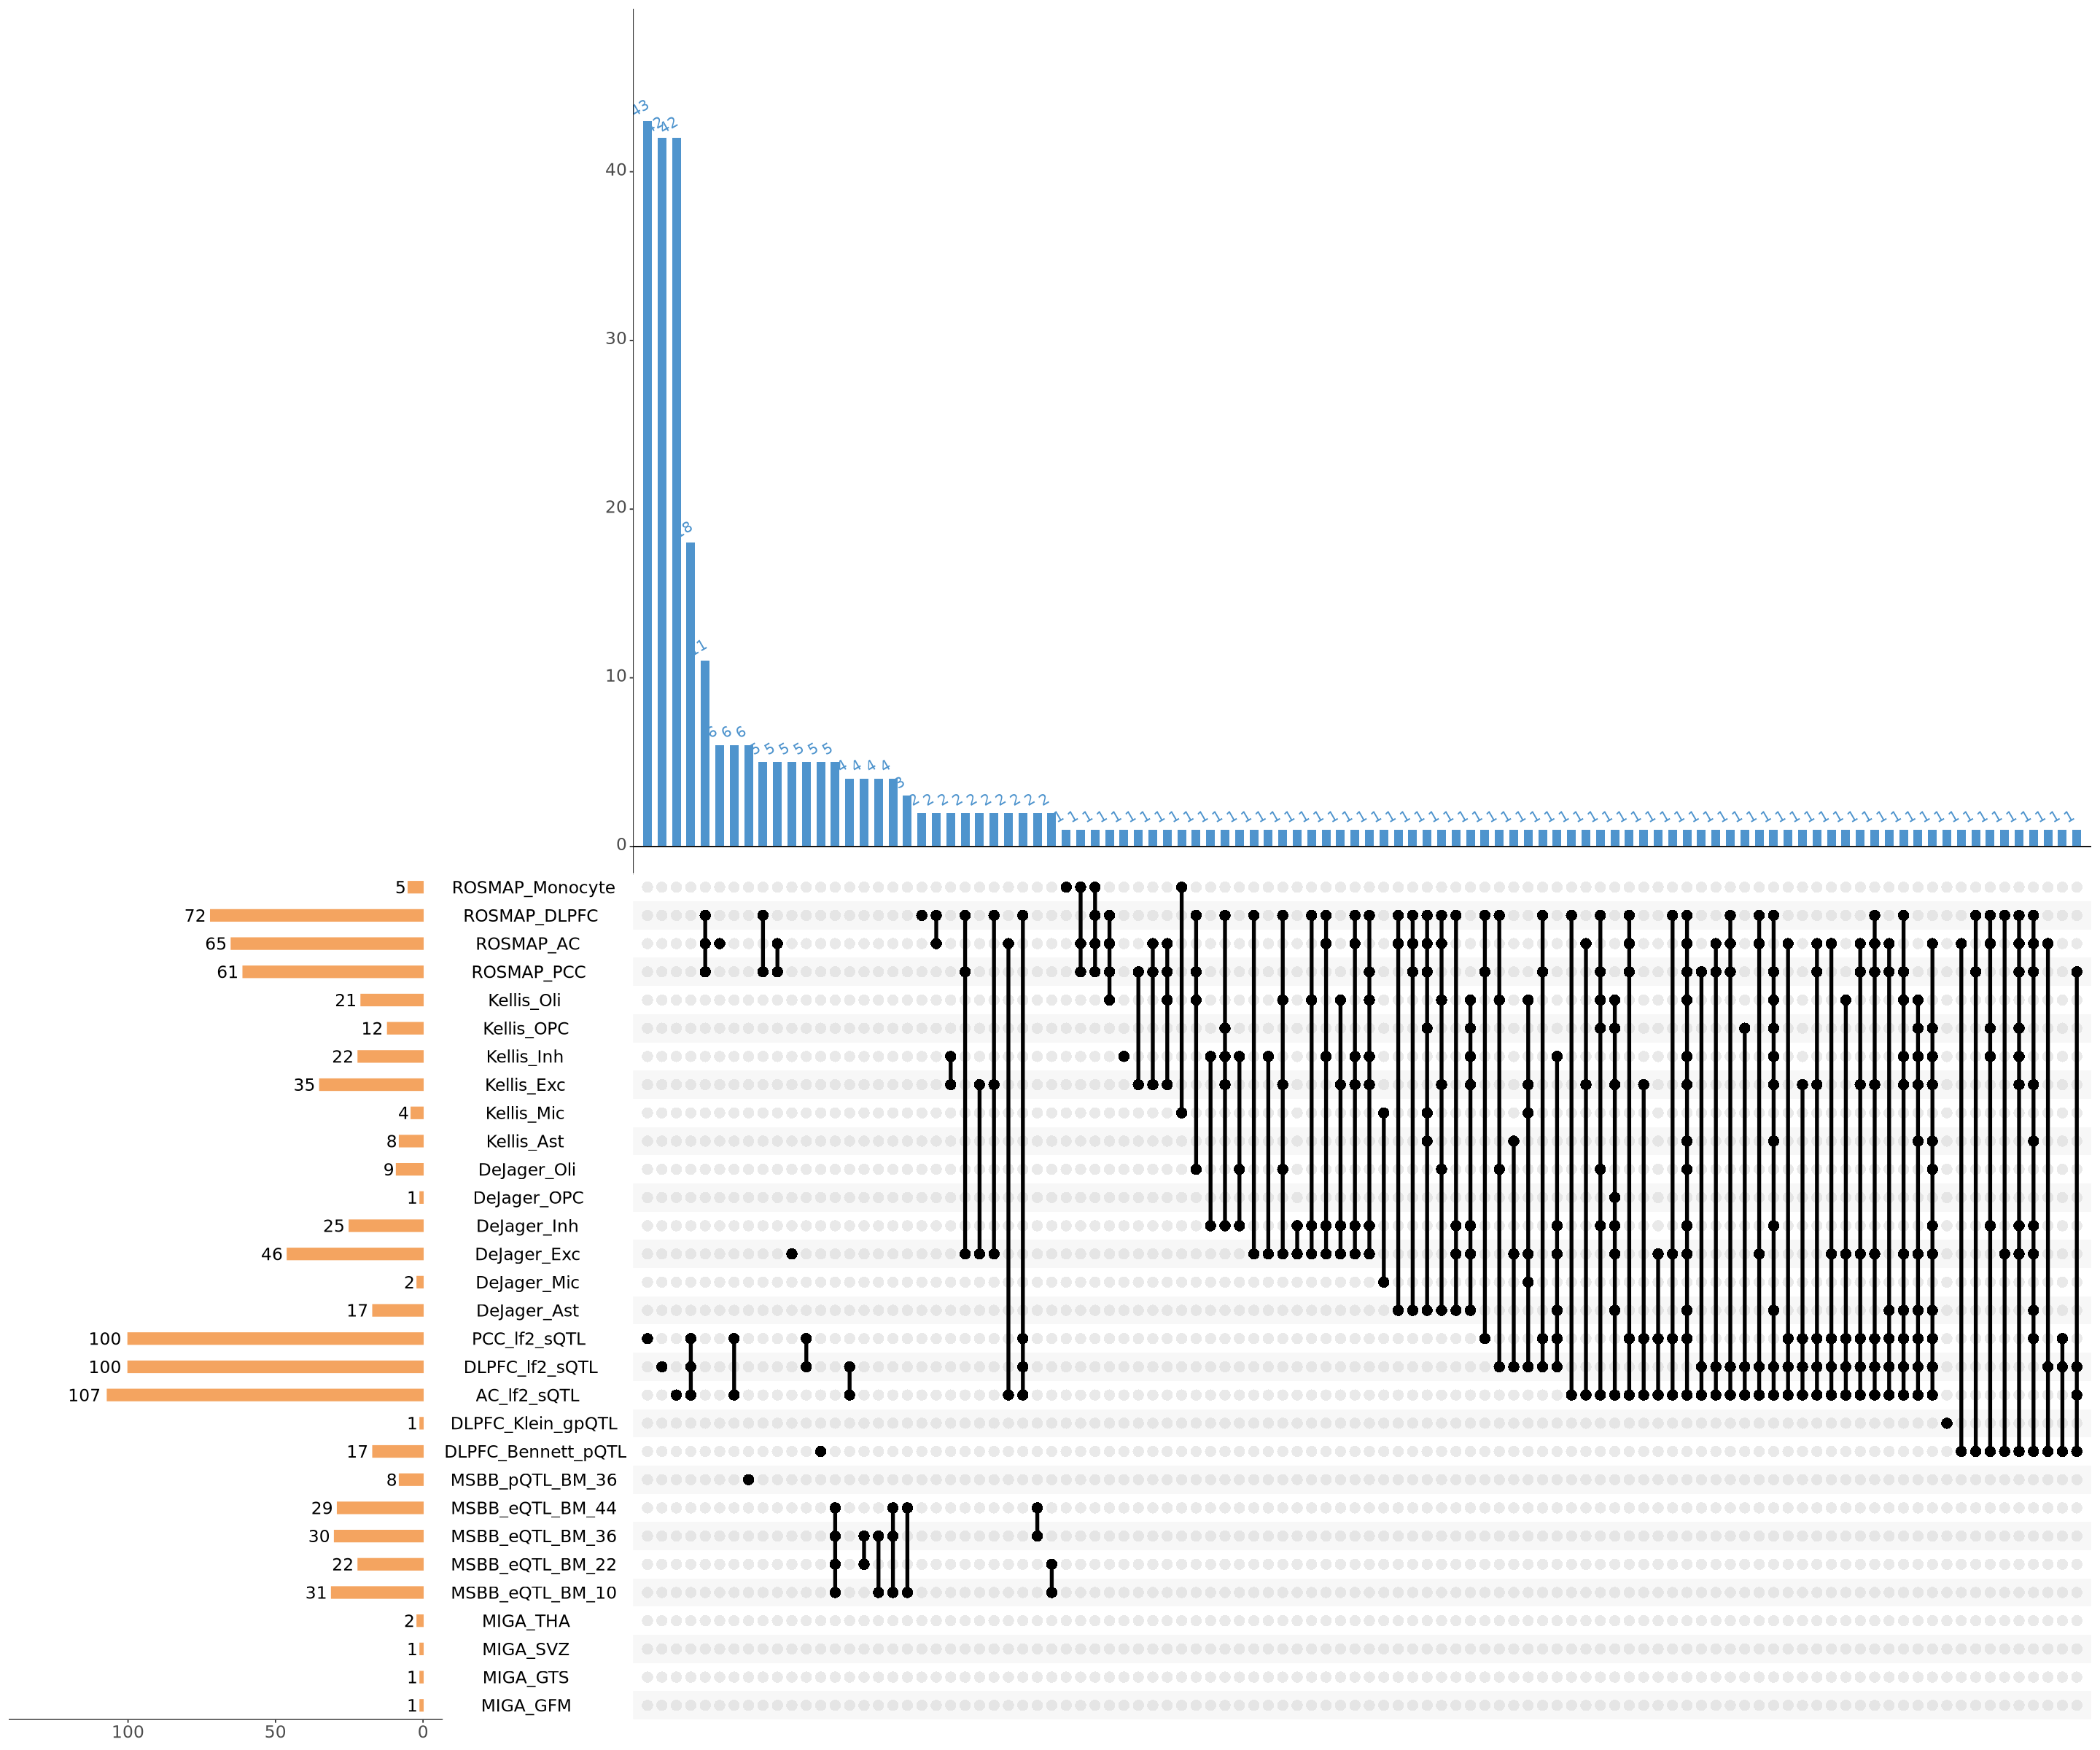

In [28]:
options(repr.plot.width = 24, repr.plot.height = 20)
library("UpSetR")
max_size <- max(sapply(coloc, length))
upset(fromList(coloc), 
            order.by = "freq", 
            keep.order = T,
            main.bar.color = "steelblue3", 
            sets.bar.color = "sandybrown", 
            text.scale = c(2,2,2,2,2), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 30, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            sets = all_contexts,  
            nsets = length(coloc),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.25*max_size,
            nintersects = 100,
            mainbar.y.label = "",
            sets.x.label = NULL)

## 3. Connect colocalized xQTL to APOE $\epsilon$2 and APOE $\epsilon$4 
Calculate LD between xQTL and APOE $\epsilon$2/APOE $\epsilon$4

- Across all 4,460 xQTLs, correlations with APOE $\epsilon$2 range from -0.233 to 0.645, while correlations with APOE $\epsilon$4 range from -0.259 to 0.306.
- Only xQTLs in NECTIN2 (ENSG00000130202) show correlations >0.5 with both APOE $\epsilon$2 and APOE $\epsilon$4; these xQTLs colocalize with three p-sQTLs. Additionally, xQTLs identified in the APOE gene that colocalize with three sQTLs show correlations >0.2 with both APOE $\epsilon$2 and APOE $\epsilon$4, while xQTLs identified in APOC2 (ENSG00000130208) colocalizing in AC and DLPFC also show correlations >0.2.

In [31]:
APOE_summary <- readRDS("xqtl_only_APOE_all_cohorts_addGWAS.rds")
APOE_summary %>% pull(APOE2_cor) %>% range
APOE_summary %>% pull(APOE4_cor) %>% range

[1] -0.2328591  0.6451459

[1] -0.2586507  0.3055206

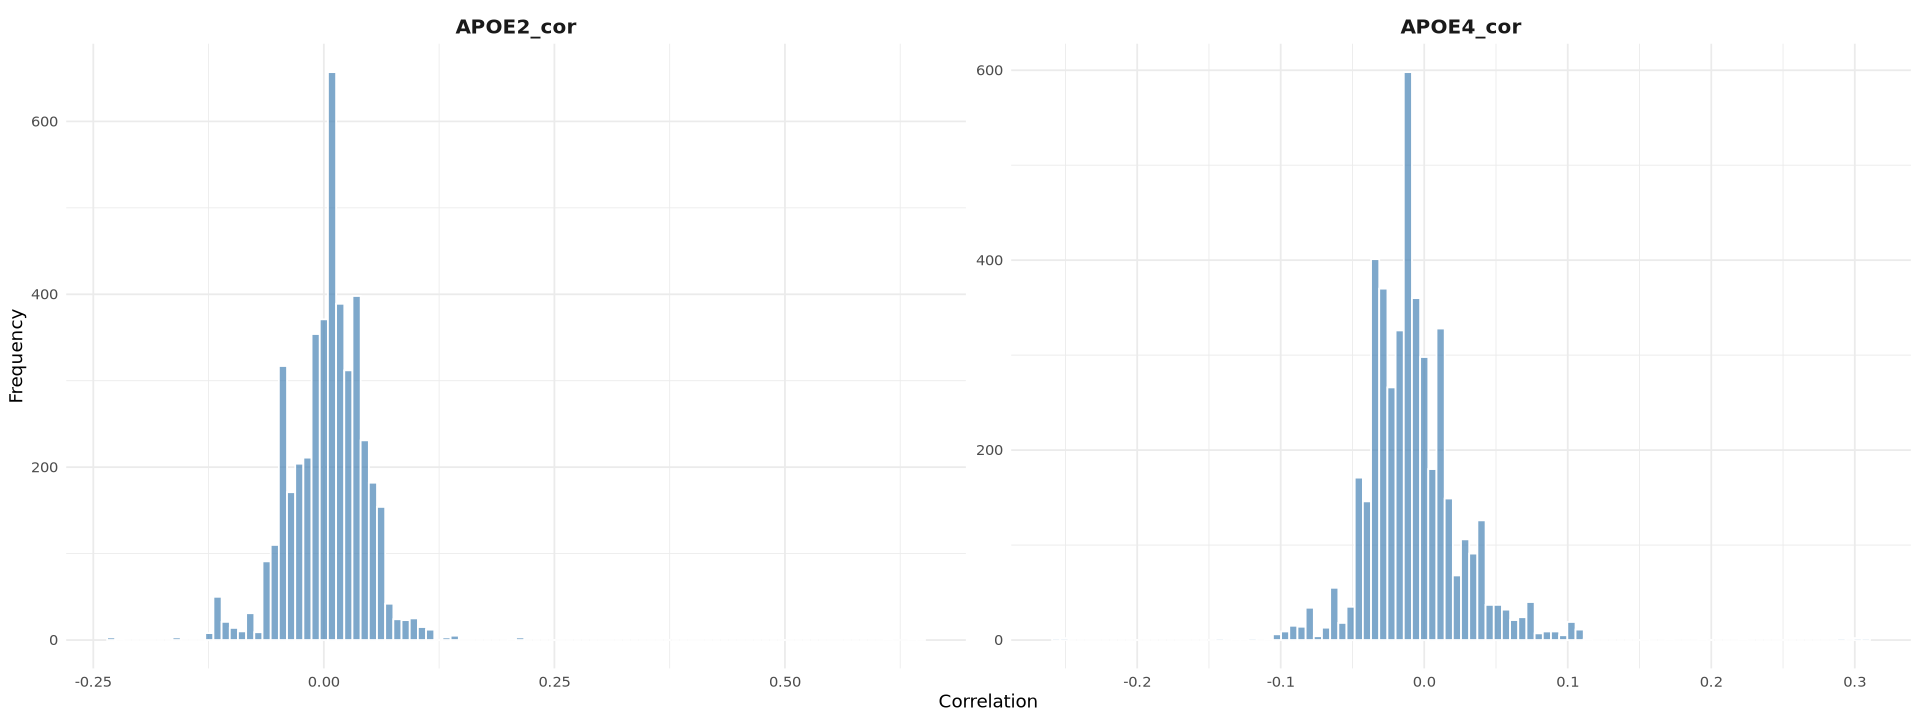

In [32]:
options(repr.plot.width = 16, repr.plot.height = 6)
library(ggplot2)
library(dplyr)
library(tidyr)

# Reshape data from wide to long format
apoe_long <- APOE_summary %>%
  select(APOE2_cor, APOE4_cor) %>%
  pivot_longer(cols = c(APOE2_cor, APOE4_cor), 
               names_to = "APOE_type", 
               values_to = "correlation") %>%
  filter(!is.na(correlation))  # Remove NA values

# Create faceted histogram
ggplot(apoe_long, aes(x = correlation)) +
  geom_histogram(bins = 100, fill = "steelblue", alpha = 0.7, color = "white") +
  facet_wrap(~ APOE_type, scales = "free") +
  labs(title = NULL, # "Distribution of APOE Correlations",
       x = "Correlation",
       y = "Frequency") +
  theme_minimal() +
  theme(strip.text = element_text(size = 12, face = "bold"))

In [34]:
APOE_summary %>% filter(abs(APOE2_cor)>0.5 | abs(APOE4_cor)>0.5)

#chr,start,end,a1,a2,variant_ID,region_ID,event_ID,cos_ID,vcp,⋯,cohort,identifier,APOE2_cor,APOE4_cor,AD_Bellenguez,AD_Kunkle_Stage1_2019,AD_Wightman_Full_2021,AD_Wightman_Excluding23andMe_2021,AD_Wightman_ExcludingUKBand23andME_2021,AD_Bellenguez_EADB_2022
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr19,44886339,44886339,A,G,chr19:44886339:G:A,ENSG00000130202,AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,ENSG00000130202:cos1:y3_y17_y18,0.76060495,⋯,ROSMAP,ENSG00000130202:cos1:y3_y17_y18; AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,0.6081370,-0.06141883,NA,17.41578,NA,50.32242,39.71942,48.88464
chr19,44893972,44893972,A,G,chr19:44893972:G:A,ENSG00000130202,AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,ENSG00000130202:cos1:y3_y17_y18,0.07649710,⋯,ROSMAP,ENSG00000130202:cos1:y3_y17_y18; AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,0.6411934,-0.05980457,82.30207,18.16768,NA,54.18003,42.13900,53.20302
chr19,44897490,44897490,A,T,chr19:44897490:T:A,ENSG00000130202,AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,ENSG00000130202:cos1:y3_y17_y18,0.07649710,⋯,ROSMAP,ENSG00000130202:cos1:y3_y17_y18; AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,0.6411934,-0.05980457,82.64226,15.36231,NA,52.53517,38.95078,54.22612
chr19,44899005,44899005,G,T,chr19:44899005:T:G,ENSG00000130202,AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,ENSG00000130202:cos1:y3_y17_y18,0.07487616,⋯,ROSMAP,ENSG00000130202:cos1:y3_y17_y18; AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,0.6451459,-0.06155799,81.99396,NA,NA,20.74840,NA,54.28826


In [38]:
APOE_summary %>% filter(abs(APOE2_cor)>0.2 | abs(APOE4_cor)>0.2)

#chr,start,end,a1,a2,variant_ID,region_ID,event_ID,cos_ID,vcp,⋯,cohort,identifier,APOE2_cor,APOE4_cor,AD_Bellenguez,AD_Kunkle_Stage1_2019,AD_Wightman_Full_2021,AD_Wightman_Excluding23andMe_2021,AD_Wightman_ExcludingUKBand23andME_2021,AD_Bellenguez_EADB_2022
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr19,44886339,44886339,A,G,chr19:44886339:G:A,ENSG00000130202,AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,ENSG00000130202:cos1:y3_y17_y18,0.76060495,⋯,ROSMAP,ENSG00000130202:cos1:y3_y17_y18; AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,0.60813703,-0.06141883,NA,1.741578e+01,NA,50.32242105,39.7194216,48.88463582
chr19,44892009,44892009,A,G,chr19:44892009:G:A,ENSG00000130203,PCC_lf2_sQTL_chr19:44905923:44906601:clu_119019_+:NE:ENSG00000130203,ENSG00000130203:ucos10:y29,0.67143294,⋯,ROSMAP,ENSG00000130203:ucos10:y29; PCC_lf2_sQTL_chr19:44905923:44906601:clu_119019_+:NE:ENSG00000130203,-0.11913992,0.30169781,NA,1.513188e+02,NA,Inf,248.0762380,148.23151063
chr19,44893972,44893972,A,G,chr19:44893972:G:A,ENSG00000130202,AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,ENSG00000130202:cos1:y3_y17_y18,0.07649710,⋯,ROSMAP,ENSG00000130202:cos1:y3_y17_y18; AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,0.64119338,-0.05980457,82.30207,1.816768e+01,NA,54.18002570,42.1390036,53.20301723
chr19,44897490,44897490,A,T,chr19:44897490:T:A,ENSG00000130202,AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,ENSG00000130202:cos1:y3_y17_y18,0.07649710,⋯,ROSMAP,ENSG00000130202:cos1:y3_y17_y18; AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,0.64119338,-0.05980457,82.64226,1.536231e+01,NA,52.53517103,38.9507820,54.22611706
chr19,44899005,44899005,G,T,chr19:44899005:T:G,ENSG00000130202,AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,ENSG00000130202:cos1:y3_y17_y18,0.07487616,⋯,ROSMAP,ENSG00000130202:cos1:y3_y17_y18; AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,0.64514587,-0.06155799,81.99396,NA,NA,20.74840001,NA,54.28826024
chr19,44905910,44905910,G,C,chr19:44905910:C:G,ENSG00000130203,AC_lf2_sQTL_chr19:44905923:44906601:clu_129667_+:NE:ENSG00000130203; DLPFC_lf2_sQTL_chr19:44905923:44906601:clu_155254_+:NE:ENSG00000130203; DLPFC_lf2_sQTL_chr19:44905841:44906601:clu_155254_+:PR:ENSG00000130203,ENSG00000130203:cos1:y2_y12_y13,0.99999616,⋯,ROSMAP,ENSG00000130203:cos1:y2_y12_y13; AC_lf2_sQTL_chr19:44905923:44906601:clu_129667_+:NE:ENSG00000130203; DLPFC_lf2_sQTL_chr19:44905923:44906601:clu_155254_+:NE:ENSG00000130203; DLPFC_lf2_sQTL_chr19:44905841:44906601:clu_155254_+:PR:ENSG00000130203,0.20506197,0.29258934,NA,NA,255.8602,226.84290488,NA,109.68731922
chr19,44905910,44905910,G,C,chr19:44905910:C:G,ENSG00000130203,PCC_lf2_

In [39]:
APOE_summary %>% 
    filter(abs(APOE2_cor)>0.2 | abs(APOE4_cor)>0.2) %>%
    pull(region_ID) %>% unique

[1] "ENSG00000130202" "ENSG00000130203" "ENSG00000130208" "ENSG00000125755"